## Assignment on Insurance Premium Prediction:

#### Problem Statement:
Insurance is a growing industry and also medical expenses of individual is increasing. And still there are lot of people who abstain from taking insurance. The challenge is to provide simple tool which can be accessible to people. By projecting future medical expenses based on the previous records, can give a fare estimate on policy premiums of an individual. With a few input parameters like age, sex, bmi, etc. people can see their medical expense. This will increase awareness on health insurance and as a result prospective customer base will increase 
#### Acknowledgement: 
This dataset is taken from kaggle.

Dataset Link: https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction


#### Goal:
It is an attempt to predict future medical expenses by using available dataset "insurance.csv". We will apply multiple linear regression models and choose the best one which gives the best result.

======================================================================================================================

#### Below are the steps we will follow to reach our goal:

1. Importing necessary Libraries
2. Loading and Reading dataset
3. Data Understanding
4. Visualizing dataset
5. Splitting the data into train and test
6. Preprocessing
7. Building Regression Models
8. Selecting the best Model

#### 1. Importing necessary Libraries

In [2]:
import pandas as pd    # itws show the4 data frame
import numpy as np     # we calulate the mathecail operations
import matplotlib.pyplot as plt    #  to create the graphy
import seaborn as sns   # its attractive colour
%matplotlib inline

#### 2. Loading and Reading dataset

In [3]:
#load data:
data_path="https://raw.githubusercontent.com/bmanishp/Datasets/main/insurance.csv"
insurance=pd.read_csv(data_path)

In [4]:
#Glimpse of dataset
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#### 3. Data Understanding

In [5]:
#shape of dataset
insurance.shape

(1338, 7)

In [6]:
#Describe on Numerical dataset # it give the statisticas
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [7]:
#Describe on categorical dataset:
insurance.select_dtypes(include='object').describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [8]:
#INFO: # check the dat types it numerical or string (object)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#Unique values in categorical columns
cat_feature=insurance.select_dtypes(include='object')
for feature in cat_feature.columns:
    print(feature,cat_feature[feature].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


Observation:-
    1. No Null values


    2. No duplicate categorical values found.


    3. Datatypes are correct

    
    4. Overall data distribution is ok but we will check further.

#### 4. Visualizing dataset

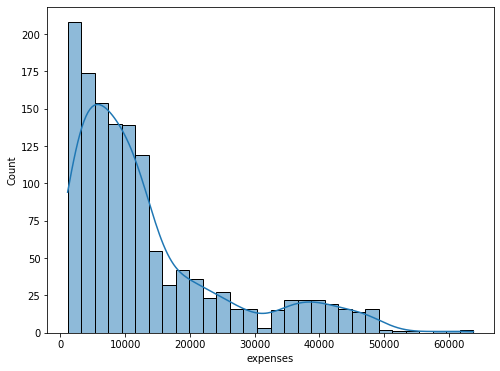

In [10]:
#Visualising Target Variable:  # to check the data is correctly fit or not
plt.figure(figsize=(8,6))
sns.histplot(insurance['expenses'],kde=True)
plt.show()

In [11]:
#distribution of target feature:
insurance[['expenses']].describe().T

,count,mean,std,min,25%,50%,75%,max
expenses,1338.0,13270.422414,12110.01124,1121.87,4740.2875,9382.03,16639.915,63770.43


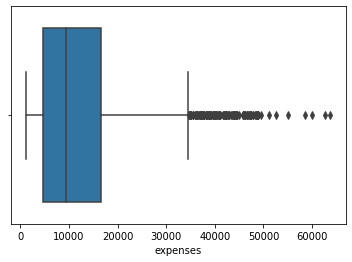

In [12]:
#visualizing distribution:   # check the  Outlier(median value)
sns.boxplot(data=insurance,x='expenses')
plt.show()

In [13]:
# Visualize Categorical Features Vs Target Variable (including children)
cat_features=insurance.select_dtypes(include='object')
cat_feature

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


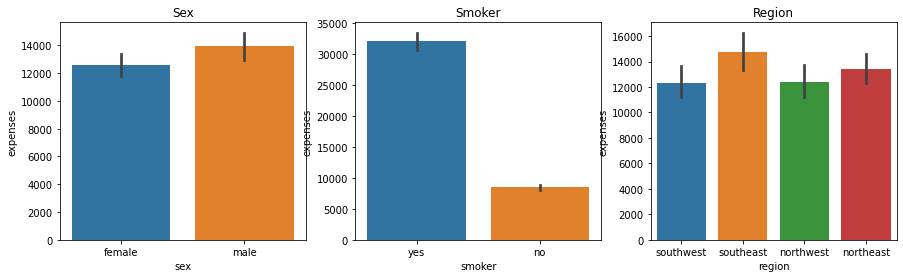

In [14]:
data=insurance.copy()
plt.figure(figsize=(15,4))
count=1
for feature in cat_features:
    plt.subplot(1,3,count)
    sns.barplot(x=feature,y='expenses',data=data)
    plt.title(str(feature).capitalize())
    plt.xlabel(feature)
    plt.ylabel('expenses')
    count=count+1
plt.show()
     # checking the male or female is high

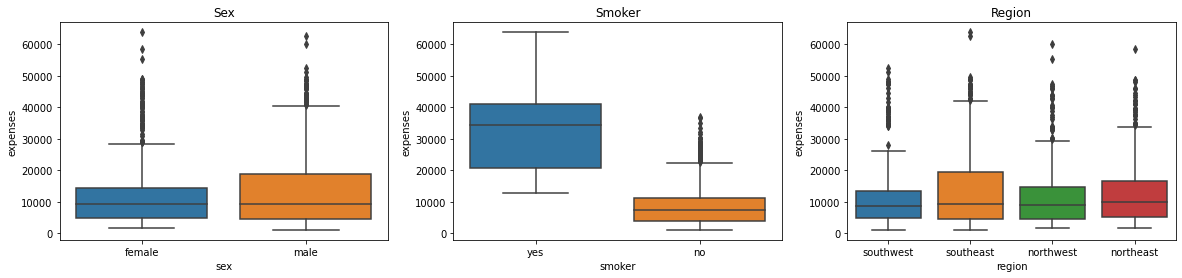

In [15]:
data=insurance.copy()
plt.figure(figsize=(20,4))
count=1
for feature in cat_features:
    plt.subplot(1,3,count)
    sns.boxplot(x=feature,y='expenses',data=data)
    plt.title(str(feature).capitalize())
    plt.xlabel(feature)
    plt.ylabel('expenses')
    count=count+1
plt.show()
      # checking the box plot for outlier€(median)  

Inferences:

    a) sex: male has higher medical expenses compared to female.
    b) somoker: Those who are smoker has higher expenses.
    c) region: southeast region has higher expeses.

In [16]:
#Visualize numerical variables against target variable:
num_features=insurance.select_dtypes(exclude='object').columns
num_features

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

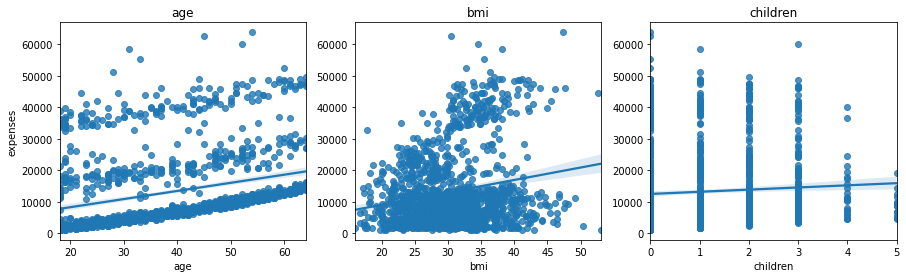

In [17]:
data=insurance.copy()
plt.figure(figsize=(15,4))
count=1
for feature in num_features.drop('expenses'):
    plt.subplot(1,3,count)
    sns.clot(x=feature,y='expenses',data=data)
    plt.title(feature)
    plt.xlabel(feature)
    if count!=1:
        plt.ylabel(None)

    count=count+1
plt.show()

Inferences:
    
    a) "age" and "bmi" are highly correlated with expenses. "children" is not affecting much.
    b) there are outliers but as dataset is small we are keeping them as it is.

<AxesSubplot:>

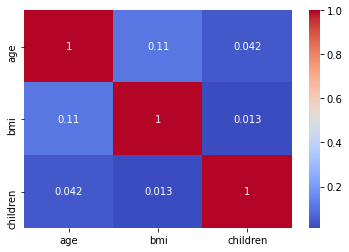

In [18]:
sns.heatmap(insurance.drop('expenses',axis=1).corr(),annot=True,cmap='coolwarm')

#### 5. Splitting the data into train and test

In [19]:
#for splitting the we are using StratifiedShufflesplit
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
#adding one column and using pd.cut:
strat_train_set=None
strat_test_set=None
insurance['expense_cat']=pd.cut(insurance['expenses'],
                               bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
                               labels=[1,2,3,4,5])

#instantiate StratifiedShufflesplit:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(insurance,insurance['expense_cat']):
    strat_train_set=insurance.loc[train_index].drop(['expense_cat'],axis=1)
    strat_test_set=insurance.loc[test_index].drop(['expense_cat'],axis=1)
    

In [21]:
#dividing in X,y
X_train=strat_train_set.iloc[:,:-1]
y_train=strat_train_set.iloc[:,-1]

X_test=strat_test_set.iloc[:,:-1]
y_test=strat_test_set.iloc[:,-1]

In [22]:
X_train.head()

,age,sex,bmi,children,smoker,region
1155,36,female,22.1,3,no,northeast
388,26,female,22.6,0,no,northwest
1329,52,male,38.6,2,no,southwest
762,33,male,27.1,1,yes,southwest
1007,47,male,28.2,3,yes,northwest


#### 6. Preprocessing

In [23]:
#Import libraries for onehotencoding and scaling
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [24]:
def preprocessing_df():
    """
    preprocessing pipeline:
    """
    numerical_columns=['age','bmi','children']
    categorical_columns=['sex','smoker','region']
    
    num_pipeline=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                                ('scaler',MaxAbsScaler())])
    cat_pipeline=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                 ('onehotencoding',OneHotEncoder()),
                                ('scaler',MaxAbsScaler())])
    
    preprocessing=ColumnTransformer([('num_pipeline',num_pipeline,numerical_columns),
                                     ('cat_pipeline',cat_pipeline,categorical_columns)])
    
    return preprocessing


In [25]:
preprocessing=preprocessing_df()
train_array_x=preprocessing.fit_transform(X_train)
test_array_x=preprocessing.transform(X_test)

In [26]:
train_preprocessed_df=pd.DataFrame(np.c_[train_array_x,np.array(y_train)])
train_preprocessed_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.562500,0.416196,0.6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7228.22
1,0.406250,0.425612,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3176.82
2,0.812500,0.726930,0.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,10325.21
3,0.515625,0.510358,0.2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,19040.88
4,0.734375,0.531073,0.6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,24915.22
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.468750,0.453861,0.2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4032.24
1066,0.859375,0.478343,0.6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,13047.33
1067,0.734375,0.679849,0.2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,42211.14
1068,0.468750,0.525424,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4137.52


In [27]:
test_preprocessed_df=pd.DataFrame(np.c_[test_array_x,np.array(y_test)])
test_preprocessed_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.546875,0.674200,0.2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5630.46
1,0.656250,0.532957,0.6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,32787.46
2,0.531250,0.551789,0.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6184.30
3,0.312500,0.696798,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4830.63
4,0.796875,0.807910,0.4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,47462.89
...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.875000,0.634652,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,10976.25
264,0.515625,0.749529,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4795.66
265,0.859375,0.563089,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,10214.64
266,0.406250,0.391714,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2302.30


In [28]:
#train & test df from preprocessed dataset:
X_train=train_preprocessed_df.iloc[:,:-1]
y_train=train_preprocessed_df.iloc[:,-1]
X_test=test_preprocessed_df.iloc[:,:-1]
y_test=test_preprocessed_df.iloc[:,-1]

#### 7. Building Models 

##### Model 1: Linear Regression

In [29]:
##Model 1:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,lr_pred)


0.751097848263522

##### Model 2: Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
params={'n_estimators':[100,200,300],
      'max_depth':[2,4,8],'min_samples_leaf':[2,3,4,6]}
gcv_rf=GridSearchCV(rf,params,scoring='r2',cv=10)
gcv_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8],
                         'min_samples_leaf': [2, 3, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [32]:
print(gcv_rf.best_params_)
print(gcv_rf.best_estimator_)
print(gcv_rf.best_score_)

{'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 200}
RandomForestRegressor(max_depth=4, min_samples_leaf=4, n_estimators=200)
0.8613646820810947


##### Model 3: Support Vector Machine Regressor

In [33]:
rf_pred=gcv_rf.predict(X_test)
r2_score(y_test,rf_pred)

0.8426445455735033

In [34]:
#SVM:
from sklearn.svm import SVR
params={'C':[40.0,10.0**2,10.0**3],'epsilon':[0.001,0.01,0.05,0.1,0.2,0.5,0.9,1,5,10],'kernel':['poly','sigmoid','rbf']}
sv=SVR()
gcv=GridSearchCV(sv,params,scoring='r2',cv=10)
gcv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [40.0, 100.0, 1000.0],
                         'epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.9, 1,
                                     5, 10],
                         'kernel': ['poly', 'sigmoid', 'rbf']},
             scoring='r2')

In [35]:
print(gcv.best_params_)
print(gcv.best_estimator_)
print(gcv.best_score_)

{'C': 1000.0, 'epsilon': 10, 'kernel': 'poly'}
SVR(C=1000.0, epsilon=10, kernel='poly')
0.755925623447195


In [36]:
gcv_pred=gcv.predict(X_test)
r2_score(y_test,gcv_pred)

0.7443594361521357

##### Model 4: Lasso

In [37]:
#Lasso:
from sklearn.linear_model import Ridge
# How to select alpha value>
# we will use grid search cv
from sklearn.model_selection import GridSearchCV

In [38]:
parameters={'alpha':[1e-15,1e-3,8e-3,1e-2,5e-2,9e-2,9e-1,1,5,10,20,30,40,50,100,150,200]}
ridge=Ridge()

In [39]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=6,verbose=1)
ridge_regressor.fit(X_train,y_train)

Fitting 6 folds for each of 17 candidates, totalling 102 fits


GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.008, 0.01, 0.05, 0.09, 0.9,
                                   1, 5, 10, 20, 30, 40, 50, 100, 150, 200]},
             scoring='r2', verbose=1)

In [40]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.09}
0.7414096613455686


#### Conclusion:

Among all the models Random Forest is giving the best accuracy 86% on training dataset and 84.16% on test dataset